# MNIST

In [40]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target =  mnist.target.astype(np.int8)

In [41]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array([5, 0, 4, ..., 4, 5, 6], dtype=int8),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel

In [42]:
X, y = mnist["data"],mnist["target"]

In [43]:
X.shape

(70000, 784)

In [44]:
y.shape

(70000,)

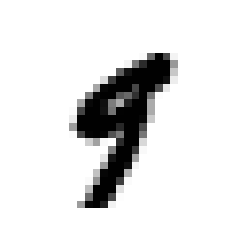

In [45]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, 
          interpolation = "nearest")
plt.axis("off")
plt.show()

In [46]:
y[36000]

9

This looks like a 9, and indeed that’s what the label tells us:

splitting the dataset into 60,000 train set and 10,000 test set.

In [47]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:], y[:60000],y[60000:]

shuffling the training set

In [48]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]


training a binary classifier

In [49]:
y_train_9 = (y_train == 9)
y_test_9 = (y_test == 9)

In [50]:
y_train_9

array([False, False,  True, ...,  True,  True, False])

In [51]:
y_test_9

array([False, False, False, ..., False, False, False])

In [52]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_9)

SGDClassifier(random_state=42)

In [53]:
sgd_clf.predict([some_digit])

array([False])

The classifier guesses that this image doesnot represents a 9 ( False )

Measuring accuracy using Cross-Validation

In [54]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, random_state = None, shuffle = True)

for train_index, test_index in skfolds.split(X_train, y_train_9):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_9[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_9[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred==y_test_fold)
    print(n_correct/len(y_pred))

0.9522
0.9503
0.93405


The StratifiedKFold class performs stratified sampling (as explained in Chapter 2)
to produce folds that contain a representative ratio of each class. At each iteration the
code creates a clone of the classifier, trains that clone on the training folds, and makes
predictions on the test fold. Then it counts the number of correct predictions and
outputs the ratio of correct predictions.

In [55]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_9, cv=3, scoring="accuracy")

array([0.9474 , 0.9493 , 0.94895])

In [56]:
from sklearn.base import BaseEstimator

class Never9Classifier(BaseEstimator):
    def fit(seld, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

In [57]:
never_9_clf = Never9Classifier()
cross_val_score(never_9_clf, X_train, y_train_9, cv=3, scoring="accuracy")

array([0.8977 , 0.90025, 0.9046 ])

CONFUSION MATRIX

In [58]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_9, cv=3)

A much better way to evaluate the performance of a classifier is to look at the confusion matrix. The general idea is to count the number of times instances of class A are
classified as class B.

In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_9, y_train_pred)

array([[52198,  1853],
       [ 1234,  4715]])

THe first row of the matrix considers non 9 images(negative class): 50086 of them were correctly classified as non 9 images(called TRUE NEGATIVE
While 3965 of them were wrongly classified as 9s(called False POSITIVE).
The second row of the matrix considers 9s images(positive class): 1708 were wrongly classified as the non 9s images(FALSE NEGATIVE)
While 4241 of them were correctly classified as the 9s images(TRUE POSITIVE).            

In [60]:
y_train_perfect_pred = y_train_9 
y_train_perfect_pred

array([False, False,  True, ...,  True,  True, False])

In [61]:
confusion_matrix(y_train_9, y_train_perfect_pred)

array([[54051,     0],
       [    0,  5949]])

A perfect classifier would have only true positives and true
negatives, so its confusion matrix would have nonzero values only on its main diago‐
nal (top left to bottom right)

precision = TP/(TP + FP) {positive precision}
recall = TP/(TP+FN)

# Precision and recall

In [62]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_9, y_train_pred))
print(recall_score(y_train_9, y_train_pred))

0.7178745432399513
0.7925701798621617


It is often convenient to combine precision and recall into a single metric called the F 1
score, in particular if you need a simple way to compare two classifiers. The F 1 score is
the harmonic mean of precision and recall.
Whereas the regular mean
treats all values equally, the harmonic mean gives much more weight to low values.
As a result, the classifier will only get a high F 1 score if both recall and precision are
high.

# F1 = 2/(1/PRECISION + 1/RECALL) = TP/(TP + (FN+FP)/2)

In [63]:
from sklearn.metrics import f1_score
f1_score(y_train_9, y_train_pred)

0.7533754094431573

Decision threshold and precision/recall tradeoff

In [64]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores


array([-3090.81134711])

In [65]:
threshold =0
y_some_digit_pred = (y_scores> threshold)

In [66]:
y_some_digit_pred

array([False])

In [67]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_9, cv = 3,
                            method = "decision_function")

how can you decide which threshold to use? For this you will first need to get the
scores of all instances in the training set using the cross_val_predict() function
again, but this time specifying that you want it to return decision scores instead of
predictions

In [68]:
y_scores

array([-20082.21286417,  -6205.87656587,   1106.0233506 , ...,
         2055.00381037,   3499.34488499,  -5081.60768814])

Instead of calling the classifier’s
predict() method, you can call its decision_function() method, which returns a
score for each instance, and then make predictions based on those scores using any
threshold you want:

Now with these scores you can compute precision and recall for all possible thresh‐
olds using the precision_recall_curve() function:

In [69]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_9, y_scores)

In [70]:
import matplotlib.pyplot as plt

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label = "Recall")
    plt.xlabel("Threshold")
    plt.legend(loc = "upper left")
    plt.ylim([0,1])

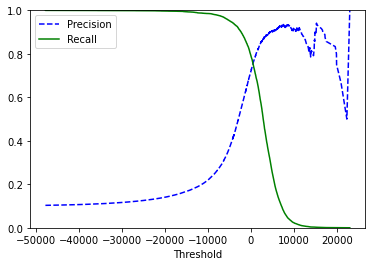

In [71]:
plot_precision_recall_vs_threshold(precisions,recalls, thresholds)
plt.show()

In [72]:
y_train_pred_90 = (y_scores>70000)
precision_score(y_train_9, y_train_pred_90)

/home/bshesh/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [73]:
recall_score(y_train_9, y_train_pred_90)

0.0

The ROC Curve

Receiver Operating Characteristic (ROC) curve is another common tool used with binary classifiers.(similar to the precision/recall curve). Instead of plotting precision versus recall, ROC curve plots the ratio of negative instances that are incorrectly classified as positive. The FPR is the ratio of negative instances that are incorrectly classified as positive.It is equal to one minus the true negative rate,
which is the ratio of negative instances that are correctly classified as negative. TNR is  called specificity. TOC curve plots sensitivity (recall) vs 1-specificity.

In [76]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_9, y_scores)

In [77]:
fpr

array([0.00000000e+00, 0.00000000e+00, 1.85010453e-05, ...,
       9.55356978e-01, 9.55356978e-01, 1.00000000e+00])

In [78]:
tpr

array([0.00000000e+00, 1.68095478e-04, 1.68095478e-04, ...,
       9.99831905e-01, 1.00000000e+00, 1.00000000e+00])

In [79]:
thresholds

array([  23049.14122335,   23048.14122335,   22370.70184295, ...,
        -47826.51008195,  -47826.91265202, -125038.85609049])

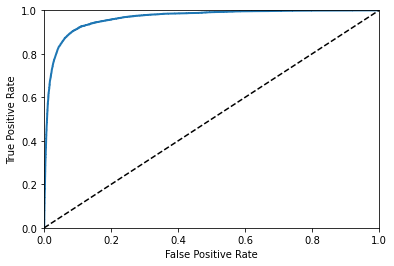

In [80]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

Once again there is a tradeoff: the higher the recall (TPR), the more false positives
(FPR) the classifier produces. The dotted line represents the ROC curve of a purely
random classifier; a good classifier stays as far away from that line as possible (toward
the top-left corner).

One way to compare classifiers is to measure the area under the curve (AUC). A per‐
fect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will
have a ROC AUC equal to 0.5.

In [81]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_9, y_scores)

0.9648649599870657

Training the RandomForestClassifier

In [82]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_9, cv=3, method = "predict_proba")

In [83]:
y_scores_forest = y_probas_forest[:, 1]      #score = probability of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_9, y_scores_forest)


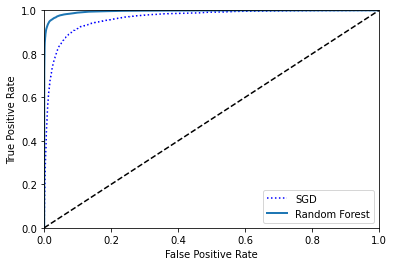

In [85]:
plt.plot(fpr,tpr, "b:", label = 'SGD')
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc = "lower right")
plt.show()

RandomForestClassifier ’s ROC curve looks much
better than the SGDClassifier ’s: it comes much closer to the top-left corner. As a
result, its ROC AUC score is also significantly better:

In [87]:
roc_auc_score(y_train_9, y_scores_forest)

0.9954932958839087